### Import Libraries

In [1419]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

### Read Data

In [1420]:
df = pd.read_csv('OxCGRT_latest-CAPABLE - OxCGRT_latest-CAPABLE.csv')
df.head(20)

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aruba,ABW,20200106,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Aruba,ABW,20200107,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Aruba,ABW,20200108,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Aruba,ABW,20200109,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aruba,ABW,20200110,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26818 entries, 0 to 26817
Data columns (total 42 columns):
CountryName                              26818 non-null object
CountryCode                              26818 non-null object
Date                                     26818 non-null int64
C1_School closing                        25782 non-null float64
C1_Flag                                  12974 non-null float64
C2_Workplace closing                     25738 non-null float64
C2_Flag                                  11301 non-null float64
C3_Cancel public events                  25738 non-null float64
C3_Flag                                  13215 non-null float64
C4_Restrictions on gatherings            25729 non-null float64
C4_Flag                                  11569 non-null float64
C5_Close public transport                25660 non-null float64
C5_Flag                                  8527 non-null float64
C6_Stay at home requirements             25696 non-null float64


###  Calculating the ratio of NaN values in each column and droping columns with more than 30% and columns that are not relevant

In [1422]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
CountryName,CountryName,0.000000
CountryCode,CountryCode,0.000000
Date,Date,0.000000
StringencyLegacyIndexForDisplay,StringencyLegacyIndexForDisplay,1.085092
StringencyIndexForDisplay,StringencyIndexForDisplay,1.085092
ContainmentHealthIndexForDisplay,ContainmentHealthIndexForDisplay,1.111194
GovernmentResponseIndexForDisplay,GovernmentResponseIndexForDisplay,1.129838
EconomicSupportIndexForDisplay,EconomicSupportIndexForDisplay,1.245432
C8_International travel controls,C8_International travel controls,3.844433
C1_School closing,C1_School closing,3.863077


In [1423]:
cols = ['CountryName','Date','StringencyLegacyIndexForDisplay','StringencyIndexForDisplay','ContainmentHealthIndexForDisplay','GovernmentResponseIndexForDisplay',
'EconomicSupportIndexForDisplay','C8_International travel controls','C1_School closing','C3_Cancel public events','C2_Workplace closing','C4_Restrictions on gatherings',
'C6_Stay at home requirements','C7_Restrictions on internal movement','H1_Public information campaigns','E1_Income support','C5_Close public transport','E2_Debt/contract relief','StringencyLegacyIndex','H3_Contact tracing','StringencyIndex','ContainmentHealthIndex','E4_International support','EconomicSupportIndex','E3_Fiscal measures','H5_Investment in vaccines','ConfirmedCases','ConfirmedDeaths']

In [1424]:
df=df[cols]

###  Fill their missing values with the mode

In [1425]:
for column in df:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [1426]:
df.head(10)

,CountryName,Date,StringencyLegacyIndexForDisplay,StringencyIndexForDisplay,ContainmentHealthIndexForDisplay,GovernmentResponseIndexForDisplay,EconomicSupportIndexForDisplay,C8_International travel controls,C1_School closing,C3_Cancel public events,...,StringencyLegacyIndex,H3_Contact tracing,StringencyIndex,ContainmentHealthIndex,E4_International support,EconomicSupportIndex,E3_Fiscal measures,H5_Investment in vaccines,ConfirmedCases,ConfirmedDeaths
0,Aruba,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aruba,20200106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Aruba,20200107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Aruba,20200108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Aruba,20200109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aruba,20200110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1427]:
df.shape

(26818, 28)

### Encoding Country Colum Using Labelencoder

In [1428]:
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['CountryName'] = labelencoder.fit_transform(df['CountryName'])

In [1429]:
df.head()

,CountryName,Date,StringencyLegacyIndexForDisplay,StringencyIndexForDisplay,ContainmentHealthIndexForDisplay,GovernmentResponseIndexForDisplay,EconomicSupportIndexForDisplay,C8_International travel controls,C1_School closing,C3_Cancel public events,...,StringencyLegacyIndex,H3_Contact tracing,StringencyIndex,ContainmentHealthIndex,E4_International support,EconomicSupportIndex,E3_Fiscal measures,H5_Investment in vaccines,ConfirmedCases,ConfirmedDeaths
0,6,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Convert date to days. Reference day january 1

In [1430]:
df['Date']=df['Date'].astype(str)

In [1431]:
from datetime import date
date_col =df['Date']

result=[]
   
for col in date_col:
    reference_date = date(2020, 1, 1)
    year = int(col[0:4])
    month = col[4:6]
    if month[0]=='0':
        month = int(month[1])
    else:
        month = int(col[4:6]) 
    day = col[6:8]
    if day[0]=='0':
        day = int(day[1])
    else:
        day = int(col[6:8])
    given_date = date(year, month, day)

    Days = (given_date - reference_date).days
    result.append(Days+1)

df['Days']=result

In [1432]:
df.drop(['Date'], axis =1, inplace =True)

### Select 12 Relevant columns which can be appropiate features to identify a country according to it’s COVID-19 record

In [1433]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
import pandas as pd

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X) # calculation Cov matrix is embeded in PCA
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
# Usage
pfa = PFA(n_features=12)
pfa.fit(df)
# To get the transformed matrix
x = pfa.features_
print(x)

[[-1.47559369 -1.11438105 -1.15666873 ... -0.02302646 -0.13581154
  -0.13185345]
 [-1.47559369 -1.11438105 -1.15666873 ... -0.02302646 -0.13581154
  -0.13185345]
 [-1.47559369 -1.11438105 -1.15666873 ... -0.02302646 -0.13581154
  -0.13185345]
 ...
 [ 0.74358933  1.18409304  1.06033361 ...  0.04239146 -0.11933665
  -0.12493187]
 [ 0.74358933  1.18409304  1.06033361 ... -0.02302646 -0.11933665
  -0.12493187]
 [ 0.74358933  1.18409304  1.06033361 ... -0.02302646 -0.1181289
  -0.12493187]]


### indices of the relevant featurea

In [1434]:
indices = pfa.indices_
indices

[13, 2, 3, 8, 19, 6, 24, 12, 16, 23, 25, 26]

### Get relevant column names in a list

In [1435]:
colnames = df.columns[indices]
colnames

Index(['H1_Public information campaigns', 'StringencyIndexForDisplay',
       'ContainmentHealthIndexForDisplay', 'C3_Cancel public events',
       'StringencyIndex', 'C8_International travel controls',
       'H5_Investment in vaccines', 'C7_Restrictions on internal movement',
       'E2_Debt/contract relief', 'E3_Fiscal measures', 'ConfirmedCases',
       'ConfirmedDeaths'],
      dtype='object')

###  clusters of similar records using features selected Kmeans Clustering Algorithm

In [1436]:
import matplotlib.pyplot as plt

data= df[colnames]
# data = data.dropna(axis=0)    
X= data[colnames]

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
pca = PCA(n_components=2).fit_transform(X_transformed) # calculation Cov matrix is embeded in PCA
kmeans = KMeans(n_clusters = 4, max_iter=600, algorithm= 'auto', random_state = 101) 
kmeans.fit(pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

### Visualize Clusters

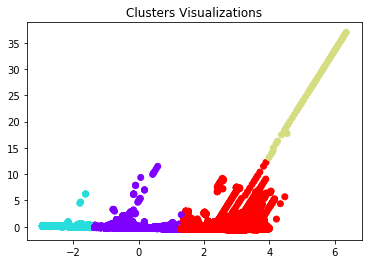

In [1437]:
# plt.figure(figsize=(12,10))
plt.scatter(pca[:,0],pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title('Clusters Visualizations');


In [1438]:
from sklearn.feature_selection import SelectKBest, chi2
model = KMeans(n_clusters = 6)
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
model.fit(pca_2d)
labels = model.predict(pca_2d)

select_feature = SelectKBest(chi2, k=5).fit(df, labels)
selected_features_df = pd.DataFrame({'Features':list(df.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Features,Scores
21,E4_International support,2.209822e+16
23,E3_Fiscal measures,2.089150e+16
24,H5_Investment in vaccines,2.446221e+08
25,ConfirmedCases,1.803704e+07
26,ConfirmedDeaths,1.300266e+06
22,EconomicSupportIndex,7.361986e+02
5,EconomicSupportIndexForDisplay,6.240840e+02
20,ContainmentHealthIndex,4.426067e+02
19,StringencyIndex,4.184231e+02
17,StringencyLegacyIndex,3.673057e+02


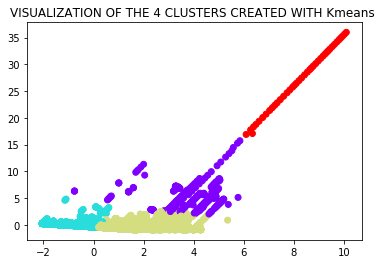

In [1439]:
import matplotlib.pyplot as plt
column = ['E4_International support','E3_Fiscal measures','H5_Investment in vaccines','ConfirmedCases','ConfirmedDeaths','EconomicSupportIndex','EconomicSupportIndexForDisplay','ContainmentHealthIndex','StringencyIndexForDisplay','StringencyIndex']

datasets= df[column]
datasets= datasets.dropna(axis=0)    
X_relevant= datasets[['E4_International support','E3_Fiscal measures','H5_Investment in vaccines','ConfirmedCases','ConfirmedDeaths','EconomicSupportIndex','EconomicSupportIndexForDisplay','ContainmentHealthIndex','StringencyIndexForDisplay','StringencyIndex']]

sc = StandardScaler()
X_transformed_best = sc.fit_transform(X_relevant)
pca_best = PCA(n_components=2).fit_transform(X_transformed_best) # calculation Cov matrix is embeded in PCA
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_best)
# plt.figure(figsize=(12,10))
plt.scatter(pca_best[:,0],pca_best[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title('VISUALIZATION OF THE 4 CLUSTERS CREATED WITH Kmeans ');


In [1440]:
import pickle
pickle.dump(kmeans,open('clustering_model.pkl','wb'))

In [1441]:
#user input
user_input = pd.DataFrame({'E4_International support':[1], 'E3_Fiscal measures':[23] , 'H5_Investment in vaccines': [1], 
                        'ConfirmedCases':[300],'ConfirmedDeaths':[40], 'EconomicSupportIndex': [60], 'EconomicSupportIndexForDisplay': [50],  'ContainmentHealthIndex':[80],'StringencyIndexForDisplay':[64], 'StringencyIndex': [81]})

In [1442]:
#add to test data
test_added = pd.concat([X_relevant, user_input])
test_added.tail()

# # #transform
test = test_added.iloc[-1] #I am on the last data 

test = test.values.reshape(1, -1)
test.shape

(1, 10)